# (Explanatory Analysis on Ford GoBike System)
## by (Ohwavworua Obakpororo Christopher)

## Investigation Overview

This presentation will be focused on an explanatory analysis on the following insights;
1. Gender patronage of the Fordgobike services
2. The ride volume per weekday
3. The effect of age(grouped into decades) in the ride duration
4. The ride duration for each usertype per weekday.


## Dataset Overview
 
 The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It covers the detais of 174202 rides observed in 15 different columns. These details include the duration of rides in minutes, the start and end time of rides, the age of riders, the sex of the riders and the user type of the riders.

In [36]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import CategoricalDtype

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [37]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Fordgobike_clean')

## Gender patronage of the Fordgobike services

The gender of each observation was recorded in the dataset. They were categorizes into three different types namely the male, female and others.
The plot below reveals that within the month of february, the Fordgobike services recorded 129982 male patronage, 40606 female patronage and 3614 patronage for others.

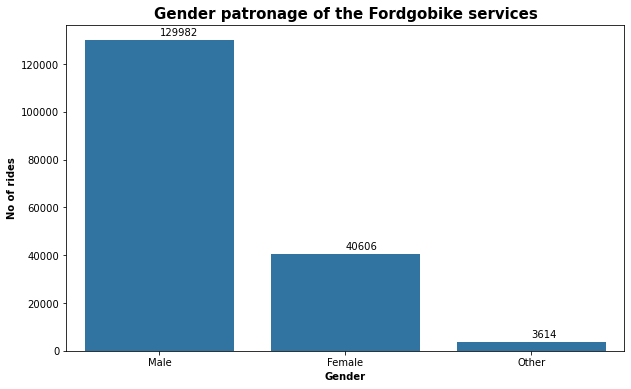

In [38]:
plt.figure(figsize = [10, 6])
member = df['member_gender'].value_counts()
member.index.values
base_color=sb.color_palette()[0]
asc = df['member_gender'].value_counts().index
sb.barplot(member.index.values, member, color = base_color, order = asc)
for i in range(member.shape[0]):
    count = member[i]
    plt.text(i,count+2000,count)
plt.xlabel('Gender', fontsize = 10, weight = 'bold')
plt.ylabel('No of rides', fontsize = 10, weight = 'bold')
plt.title('Gender patronage of the Fordgobike services', fontsize = 15, weight = 'bold');

## The ride volume per weekday

The height of the bar plot below shows the different number of rides that were completed on each day of the week. The plot reveals that thursdays recorded the most rides for the week while the weekends i.e saturdays and sundays recorded the least number of rides taken.

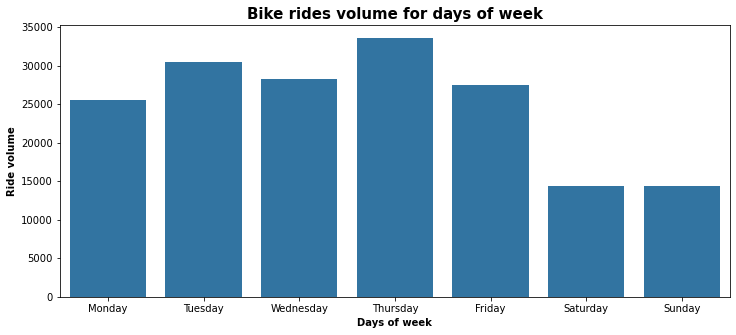

In [39]:
# plot showing the bikerides counts for each weekday by usertype

plt.figure(figsize = [12, 5])
wkday = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df['day_of_week']= df['day_of_week'].astype(CategoricalDtype(wkday, ordered = True))
base_color=sb.color_palette()[0]
asc = df['day_of_week'].value_counts().index
sb.countplot(data = df, x='day_of_week',color = base_color)
plt.title('Bike rides volume for days of week',fontsize = 15, weight = 'bold')
plt.xlabel('Days of week',fontsize = 10, weight = 'bold')
plt.ylabel('Ride volume',fontsize = 10, weight = 'bold');

## The effect of age(grouped into decades) in the ride duration

A line plot showing the trend of the age decade fluctuation reveals that persons within 20 to 39 years completed their rides between 10 to 11 mins while persons within 40 to 59 years completed their time in aproximately 12mins. Also persons within 70 to 80 years completed their rides in less than 8mins.

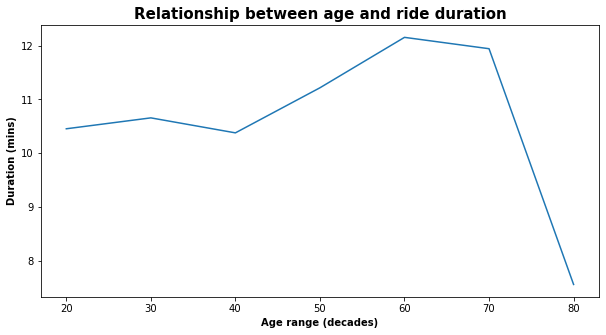

In [40]:
# grouping the member age into decades
df['age_decades'] = [member_age//10*10 for member_age in df.member_age]

# plot showing the relationship between age(decade) and ride duration.
wkday = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df['day_of_week']= df['day_of_week'].astype(CategoricalDtype(wkday, ordered = True))
plt.figure(figsize=(10,5))
sb.lineplot(data=df, y= 'ride_duration_in_mins', x = 'age_decades', ci = None)
plt.title('Relationship between age and ride duration',fontsize = 15, weight = 'bold')
plt.xlabel('Age range (decades)',fontsize = 10, weight = 'bold')
plt.ylabel('Duration (mins)',fontsize = 10, weight = 'bold');

##  The ride duration for each usertype per weekday

The chart below shows the mean duration for each user type per weekday. It reveals that subscribers have an almost even mean duration for all weekdays. While customers on the other hand, recorded the highest mean ride duration on sunday and saturday.

<Figure size 2880x1440 with 0 Axes>

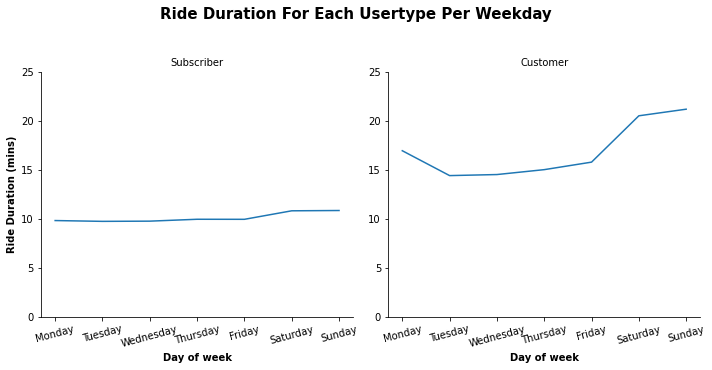

In [41]:

plt.figure(figsize = [40,20])
wkday = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df['day_of_week']= df['day_of_week'].astype(CategoricalDtype(wkday, ordered = True))
g =sb.FacetGrid(data = df, col = 'user_type',height= 5, sharey=False, ylim = (0,25), margin_titles = True)
g.map_dataframe(sb.lineplot, x='day_of_week', y ='ride_duration_in_mins',ci=None)
g.set_axis_labels('Day of week','Ride Duration (mins)', fontsize = 10, weight = 'bold')
g.set_titles(col_template = '{col_name}',fontsize = 15)
g.set_xticklabels(rotation = 15)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Ride Duration For Each Usertype Per Weekday',fontsize = 15, weight = 'bold');